In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# **Dự đoán giá trị sản phẩm**
Trong phần tiếp theo chúng tôi sẽ dự đoán giá thành của các sản phẩm không có giá trong tập dữ liệu bằng các mô hình hồi quy.

In [2]:
dataset = pd.read_excel("D:\Subject\Year 3\DO_AN_2\dataset\preprocessed_laptop.xlsx", engine="openpyxl")
dataset.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ACER\AppData\Local\Temp\ipykernel_316\2899015206.py:1: SyntaxWarning: invalid escape sequence '\S'
  dataset = pd.read_excel("D:\Subject\Year 3\DO_AN_2\dataset\preprocessed_laptop.xlsx", engine="openpyxl")


,links-href,Condition,Name,Brand,Prices,CPU,RAM,ROM,Gpu,Screen,Weight,Os_sys,cpu_tier,gpu_tier,condition_tier,os_tier,screen_tier
0,https://laptopaz.vn/new-100-lenovo-loq-2024-15...,New,LOQ 2024 15ARP9,Lenovo,21.89,Ryzen 7-7435HS,0.200000,0.20332,RTX 4060 8GB,"15.6"" FHD 144Hz",0.619048,Windows 11,1,2,3,3,1
1,https://laptopaz.vn/new-100-lenovo-legion-5-r7...,New,Legion 5 R7000 2024 15AHP9,Lenovo,23.99,Ryzen 7-8745H,0.200000,0.20332,RTX 4060 8GB,15.6'' FHD 144Hz,0.619048,Windows,1,2,3,0,1
2,https://laptopaz.vn/new-100-lenovo-loq-2024-15...,New,LOQ 2024 15ARP9,Lenovo,20.89,Ryzen 7-7435HS,0.200000,0.20332,RTX 4050 6GB,"15.6"" FHD 144Hz",0.619048,Windows 11,1,1,3,3,1
3,https://laptopaz.vn/new-100-lenovo-thinkbook-1...,New,Thinkbook 14 G6+ 2024,Lenovo,21.89,Ryzen 7-8845H,0.466667,0.46888,AMD Graphics,"14.0"" 2K IPS 120Hz",0.190476,Windows 11,1,1,3,3,2
4,https://laptopaz.vn/new-100-lenovo-legion-5-r7...,New,Legion 5 R7000 2024 15AHP9,Lenovo,22.99,Ryzen 7-8745H,0.200000,0.20332,RTX 4050 6GB,15.6'' FHD 144Hz,0.619048,Windows,1,1,3,0,1


Thực hiện tạo ra tập huấn luyện với các sản phẩm có giá và tập kiểm thử với các sản phẩm không có giá

In [3]:
train_data = dataset[dataset['Prices'].notnull()]

In [4]:
test_data = dataset[dataset['Prices'].isna()]

In [5]:
x_train = train_data[['Weight','cpu_tier','gpu_tier','condition_tier','screen_tier','os_tier',"RAM",'ROM']]
y_train = train_data['Prices']
x_test = test_data[['Weight','cpu_tier','gpu_tier','condition_tier','screen_tier','os_tier','RAM','ROM']]
y_test = test_data['Prices']

Kiểm thử từng mô hình hồi quy với cross-validation.

In [6]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [7]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

Qua kết quả, chúng tôi quyết định sử dụng mô hình Gradient Boosting, mô hình cho kết quả tốt nhất.

In [8]:
results = []
names = []
for name, model in models.items():
  kfold = KFold(n_splits=5, random_state=42, shuffle=True)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Linear Regression: -89.341036 (13.634355)
Decision Tree: -67.280439 (10.458793)
Random Forest: -42.295634 (9.995377)
Gradient Boosting: -39.996384 (4.039660)


Khởi tạo mô hình và dự đoán giá.

In [9]:
model = GradientBoostingRegressor(random_state=42)
model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [10]:
y_pred = model.predict(x_test)
print(y_pred)  

[36.46433683 35.58410646 40.52783333 45.62184444 64.14336911 16.67047536
 17.01824968 12.90869204 21.65527167 25.43892163 36.46433683 24.48347402
 21.99583241 33.02313959 16.67047536 13.57994036 36.64942693 37.76790968
 30.64663559 17.85535694 25.8807185  18.53369329 30.05309497  8.68114886
 21.8061095  16.79322728 17.85535694 13.74965237 17.86321331 25.04766164
 18.63548617 32.53983016 33.22891776 33.48987505 34.40644281 35.26959186
  9.15953642 17.12021945 17.74173785 11.76662062 18.13416139 10.69773917
 16.87407469 18.84934054]


In [11]:
test_data['Prices'] = y_pred
test_data.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_316\2977742990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prices'] = y_pred


,links-href,Condition,Name,Brand,Prices,CPU,RAM,ROM,Gpu,Screen,Weight,Os_sys,cpu_tier,gpu_tier,condition_tier,os_tier,screen_tier
72,https://laptopaz.vn/dell-gaming-g16-7620-intel...,New,Gaming G16 7620,Dell,36.464337,Core i7-12700H,0.200000,0.46888,RTX 3060 6GB,"16"" 2K 165Hz IPS",0.738095,Windows 11,1,2,3,3,2
123,https://laptopaz.vn/new-100-dell-gaming-g15-55...,New,Gaming G15 5525,Dell,35.584106,Ryzen 7-6800H,0.200000,0.20332,RTX 3060 6GB,15.6'' 2K 240Hz,0.690476,Windows 11,1,2,3,3,2
163,https://laptopaz.vn/new-outlet-lenovo-thinkpad...,Outlet,ThinkPad P16,Lenovo,40.527833,Core i7-13850HX,0.466667,0.20332,RTX A2000 8GB,16” 2K 165Hz,0.880952,Windows 11,1,1,1,3,2
164,https://laptopaz.vn/new-100-lenovo-thinkpad-p1...,New,ThinkPad P16,Lenovo,45.621844,Core i9-13980HX,0.200000,0.20332,RTX A2000 8GB,16” FHD,0.880952,Windows 11,2,1,3,3,1
165,https://laptopaz.vn/new-outlet-lenovo-thinkpad...,Outlet,ThinkPad P16,Lenovo,64.143369,Core i7-14700HX,0.466667,0.46888,RTX A1000 6GB,16” 4K,0.880952,Windows 11,1,1,1,3,6


In [12]:
test_data.to_excel("D:\Subject\Year 3\Do_an_2\dataset\predict_product_data.xlsx", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ACER\AppData\Local\Temp\ipykernel_316\1771115078.py:1: SyntaxWarning: invalid escape sequence '\S'
  test_data.to_excel("D:\Subject\Year 3\Do_an_2\dataset\predict_product_data.xlsx", index=False)


# **Phân loại phân khúc sản phẩm**

Chúng tôi sử dụng các mô hình học không giám sát để phân cụm ra 3 phân khúc sản phẩm cho các sản phẩm.

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Mô hình KMeans

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [15]:
labels = kmeans.fit_predict(train_data[['Weight','cpu_tier','gpu_tier','condition_tier','screen_tier','os_tier',"RAM",'ROM','Prices']])

c:\Users\ACER\anaconda3\envs\DoAn2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Sử dụng PCA để trực quan hóa dữ liệu.

In [17]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(train_data[['Weight','cpu_tier','gpu_tier','condition_tier','screen_tier','os_tier',"RAM",'ROM', 'Prices']])

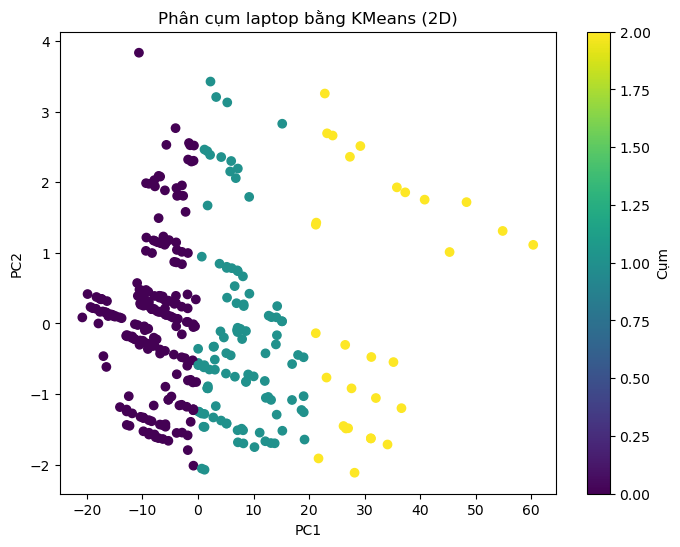

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=labels, cmap='viridis')
plt.title('Phân cụm laptop bằng KMeans (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cụm')
plt.show()

KMeans phân rõ ràng được 3 cụm riêng biệt

In [ ]:
train_data['cluster'] = labels
cluster_price_avg = train_data.groupby('cluster')['Prices'].mean()
cluster_price_std = train_data.groupby('cluster')['Prices'].std()
cluster_price_min = train_data.groupby('cluster')['Prices'].min()
cluster_price_max = train_data.groupby('cluster')['Prices'].max()

C:\Users\ACER\AppData\Local\Temp\ipykernel_20024\886519558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cluster'] = labels


In [ ]:
cluster_sumary_Kmeans = pd.DataFrame([cluster_price_avg,cluster_price_std,cluster_price_min,cluster_price_max], index=['Average','STD','Min','Max'])

In [ ]:
cluster_sumary_Kmeans

cluster,0,1,2
Average,16.987273,32.225962,56.480967
STD,4.743656,5.364623,9.904461
Min,3.990000,24.890000,45.890000
Max,24.490000,43.990000,85.000000


Mô hình DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=6)
labels_DBS = dbscan.fit_predict(X_PCA)

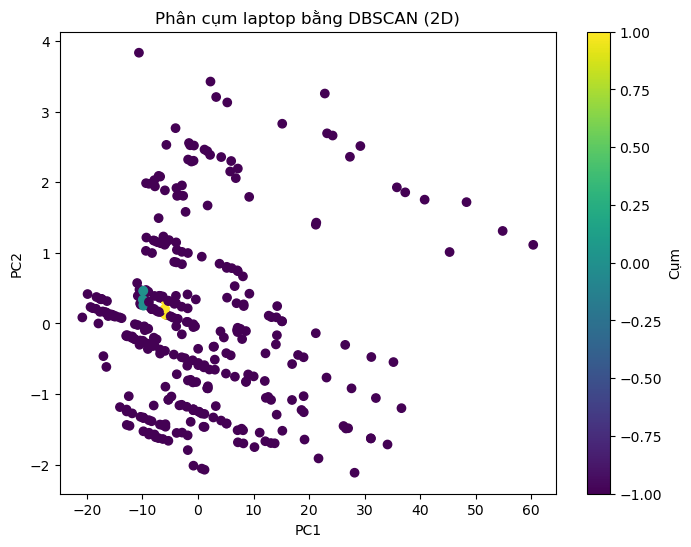

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=labels_DBS, cmap='viridis')
plt.title('Phân cụm laptop bằng DBSCAN (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cụm')
plt.show()

DBSCAN không phù hợp với bài toán này

In [ ]:
train_data['cluster'] = labels_DBS
cluster_price_avg = train_data.groupby('cluster')['Prices'].mean()
cluster_price_std = train_data.groupby('cluster')['Prices'].std()
cluster_price_min = train_data.groupby('cluster')['Prices'].min()
cluster_price_max = train_data.groupby('cluster')['Prices'].max()

C:\Users\ACER\AppData\Local\Temp\ipykernel_20024\705764176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cluster'] = labels_DBS


In [ ]:
cluster_sumary = pd.DataFrame([cluster_price_avg,cluster_price_std,cluster_price_min,cluster_price_max], index=['Average','STD','Min','Max'])

In [ ]:
cluster_sumary

cluster,-1,0,1
Average,25.117768,14.947143,18.890000
STD,13.182827,0.053452,0.126491
Min,3.990000,14.890000,18.690000
Max,85.000000,14.990000,18.990000


Chúng tôi quyết định chọn KMeans để phân cụm cho tập kiểm thử. Để kiểm tra xem với giá trị đó có đáng với phân khúc của nó không

In [21]:
test_data['cluster'] = kmeans.predict(test_data[['Weight','cpu_tier','gpu_tier','condition_tier','screen_tier','os_tier',"RAM",'ROM','Prices']])

C:\Users\ACER\AppData\Local\Temp\ipykernel_316\2921848848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['cluster'] = kmeans.predict(test_data[['Weight','cpu_tier','gpu_tier','condition_tier','screen_tier','os_tier',"RAM",'ROM','Prices']])


Thuật toán đánh giá giá trị

In [22]:
cluster_price_info = {
    0: {"avg": 16.98, "std": 4.74},
    1: {"avg": 32.23, "std": 5.36},
    2: {"avg": 56.48, "std": 9.90},
}

In [23]:
def assess_price(row):
    avg = cluster_price_info[row['cluster']]['avg']
    std = cluster_price_info[row['cluster']]['std']
    price = row['Prices']  # cột chứa giá đã dự đoán

    if price < avg - std:
        return "Rẻ"
    elif price > avg + std:
        return "Đắt"
    else:
        return "Phù hợp"

In [24]:
test_data['price_assessment'] = test_data.apply(assess_price, axis=1)

C:\Users\ACER\AppData\Local\Temp\ipykernel_316\2355270251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['price_assessment'] = test_data.apply(assess_price, axis=1)


Kết quả đánh giá

In [25]:
test_data[['Prices','cluster','price_assessment']]

,Prices,cluster,price_assessment
72,36.464337,1,Phù hợp
123,35.584106,1,Phù hợp
163,40.527833,1,Đắt
164,45.621844,2,Rẻ
165,64.143369,2,Phù hợp
167,16.670475,0,Phù hợp
169,17.018250,0,Phù hợp
178,12.908692,0,Phù hợp
181,21.655272,0,Phù hợp
199,25.438922,1,Rẻ


Lưu lại kết quả

In [26]:
test_data.to_excel("D:\Subject\Year 3\Do_an_2\dataset\predict_product_data.xlsx", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ACER\AppData\Local\Temp\ipykernel_316\1771115078.py:1: SyntaxWarning: invalid escape sequence '\S'
  test_data.to_excel("D:\Subject\Year 3\Do_an_2\dataset\predict_product_data.xlsx", index=False)
